In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
n = 1000 # max number of combined variables
M = 100000 # number of extracted samples to draw pdfs

x1 = st.uniform.rvs(0, 1, size = (n, M))

# For the second variable x2 we need a temporary array
tmp = st.uniform.rvs(0, 1, size = (n, M))
which = (tmp<0.5)

x2 = np.zeros((n, M))
x2[which]  = st.uniform.rvs(0.0, 0.2, size=which.sum())
x2[~which] = st.uniform.rvs(0.8, 0.2, size=(~which).sum())

In [3]:
# print(which)
# print(which.sum())
# print(~which)
# print(~np.array([True]))

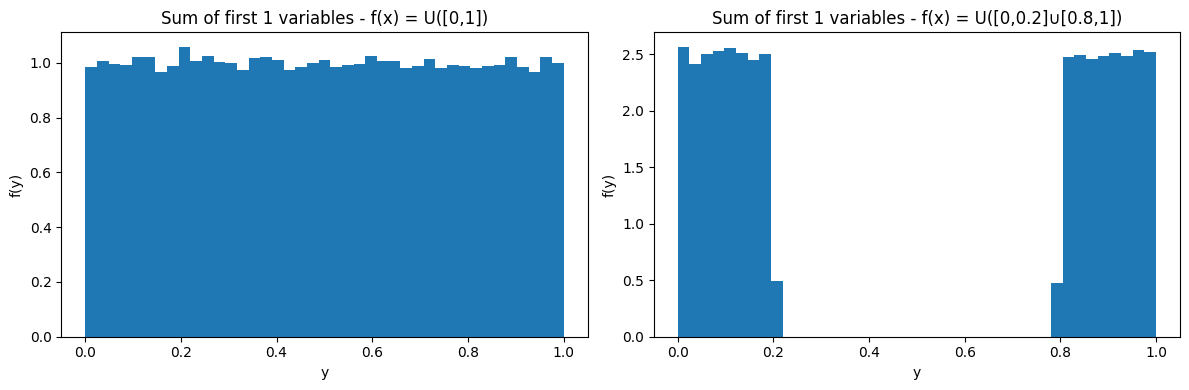

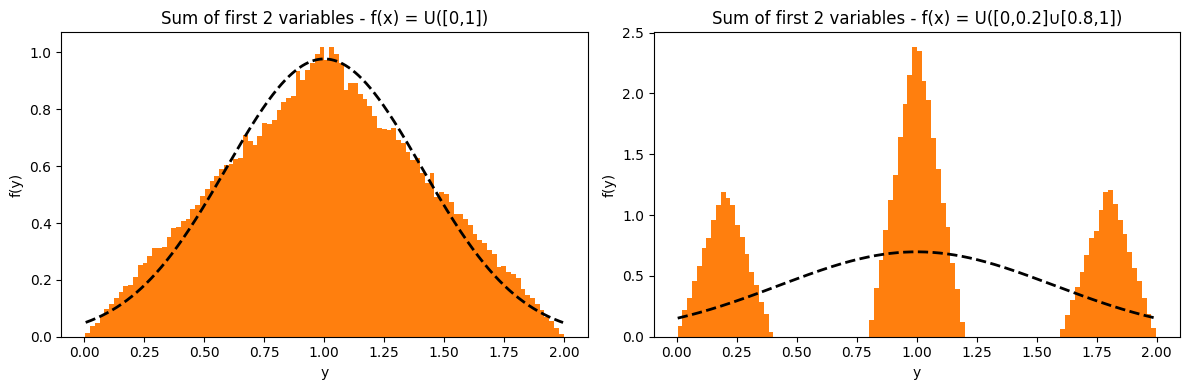

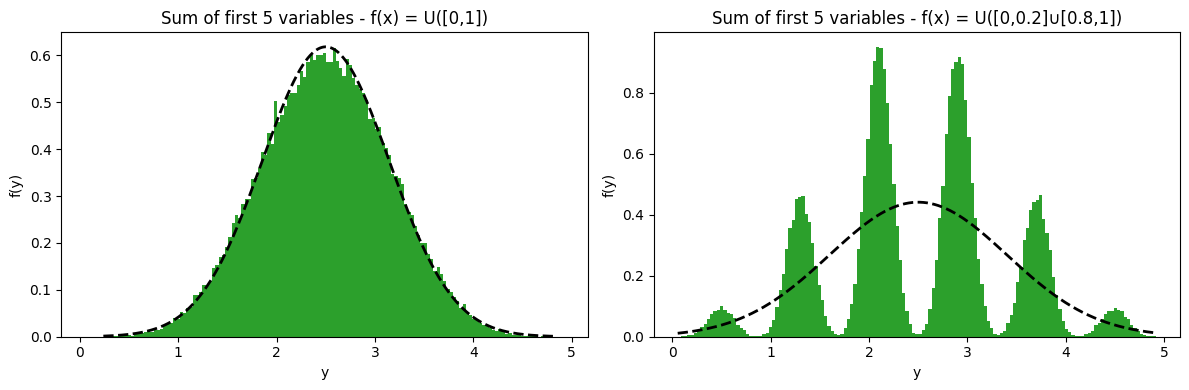

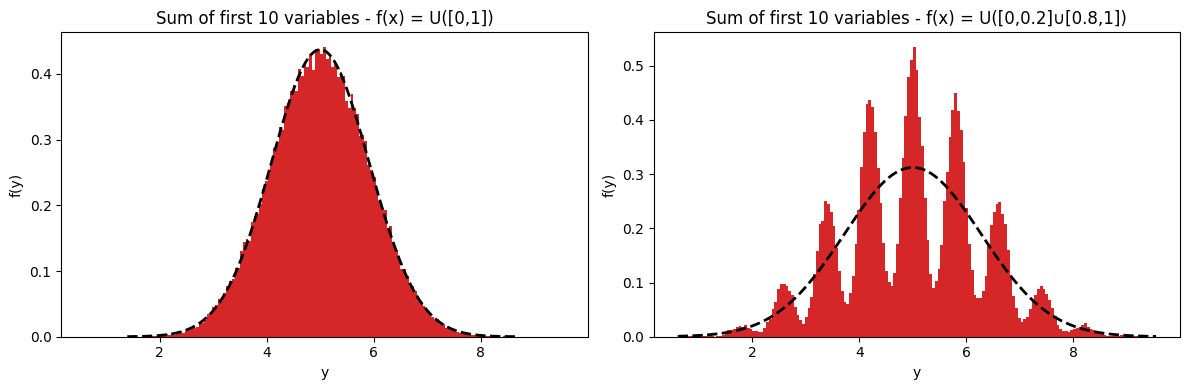

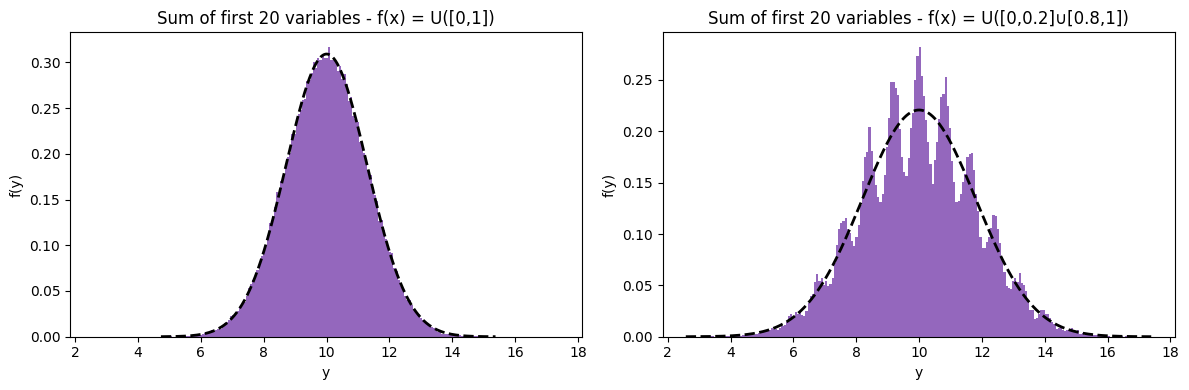

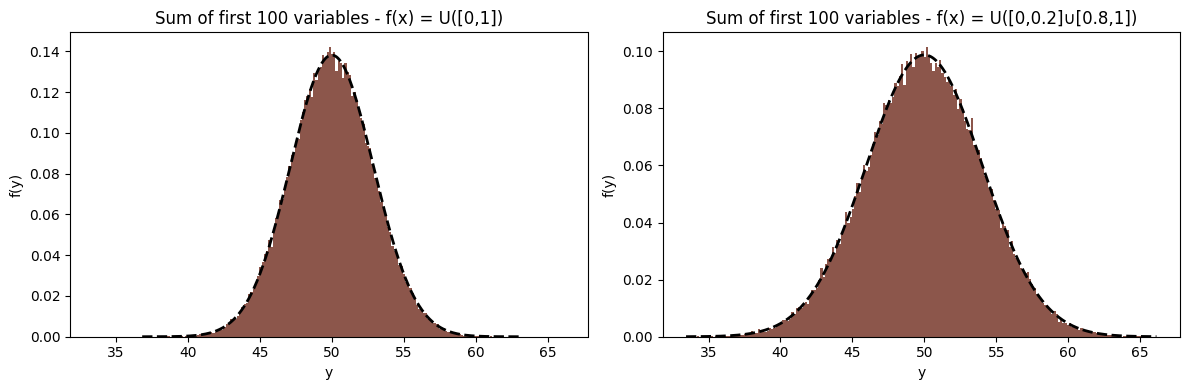

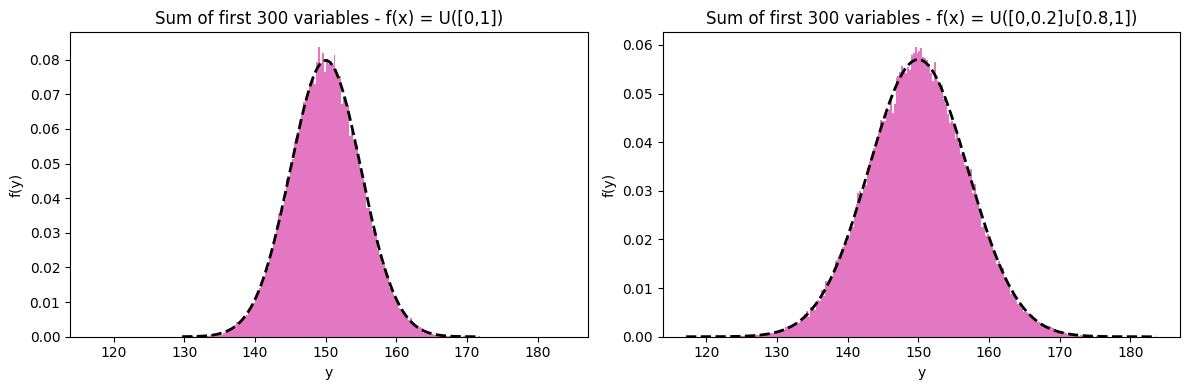

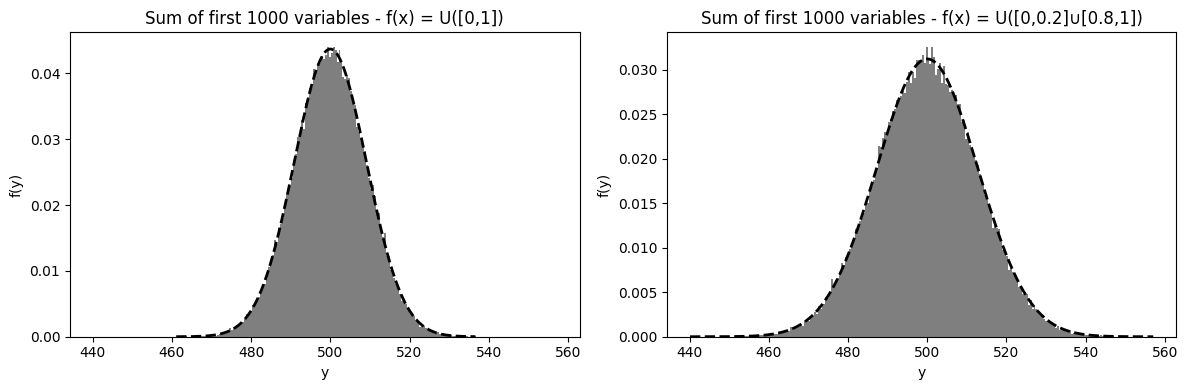

In [4]:
# choose how many of the n variables to sum
tested_m = [1, 2, 5, 10, 20, 100, 300, 1000]

for i, m in enumerate(tested_m):
    # summing the first m variables
    s1 = x1[:m, :].sum(axis=0)   # shape (M,)
    s2 = x2[:m, :].sum(axis=0)   # shape (M,)
    
    # Use common bins so the plots are comparable (code suggested by chatgpt)
    bins = np.histogram_bin_edges(np.concatenate([s1, s2]), bins="auto")
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    ax[0].hist(s1, bins=bins, density=True, color = 'C{0:d}'.format(i))
    ax[0].set_title(f"Sum of first {m} variables - f(x) = U([0,1])")
    
    ax[1].hist(s2, bins=bins, density=True, color = 'C{0:d}'.format(i))
    ax[1].set_title(f"Sum of first {m} variables - f(x) = U([0,0.2]∪[0.8,1])")

    if(i>0):
        mu = m * 0.5
        sigma1 = np.sqrt(m) * (1./np.sqrt(12))
        sigma2 = np.sqrt(m) * np.sqrt(49./300)
        
        xline1 = np.linspace(np.min(s1), np.max(s1), 10000)
        xline2 = np.linspace(np.min(s2), np.max(s2), 10000)
        yline1 = st.norm.pdf(xline1, loc = mu, scale = sigma1)
        yline2 = st.norm.pdf(xline2, loc = mu, scale = sigma2)
        ax[0].plot(xline1, yline1, color = 'black', linestyle = '--', linewidth = 2)
        ax[1].plot(xline2, yline2, color = 'black', linestyle = '--', linewidth = 2)
    
    for a in ax:
        a.set_xlabel("y")
        a.set_ylabel("f(y)")
    
    plt.tight_layout()
    plt.show()